<a href="https://colab.research.google.com/github/Sidhrathi/feature-engineering-ibm-hr/blob/main/feature_engineering_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering Mini Project — IBM HR Dataset

This notebook is prepared to run on Google Colab or local Jupyter. Follow cells sequentially.

In [ ]:
# ✅ Option A: Upload local dataset
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

# Replace the filename below with your uploaded file name
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

df.head()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Default path included in this project archive
csv_path = 'data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
print('Attempting to load:', csv_path)
try:
    df = pd.read_csv(csv_path)
    print('Loaded from data folder, shape:', df.shape)
except Exception as e:
    print('Failed to load from data folder:', e)
    # Attempt to find uploaded files in Colab session
    import os
    for f in os.listdir('.'):
        if f.lower().endswith('.csv'):
            print('Found CSV in session:', f)
            df = pd.read_csv(f)
            break

# Quick peek
print(df.columns.tolist())
df.head()

Attempting to load: data/WA_Fn-UseC_-HR-Employee-Attrition.csv
Failed to load from data folder: [Errno 2] No such file or directory: 'data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
Found CSV in session: WA_Fn-UseC_-HR-Employee-Attrition.csv
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Example cleaning steps (run after loading df)
# Standardize column names
if 'df' in globals():
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
    df = df.drop_duplicates()
    if 'age' in df.columns:
        df.loc[df['age']>100,'age'] = np.nan
    # Impute numeric with median and categorical with mode
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    for c in num_cols:
        df[c].fillna(df[c].median(), inplace=True)
    for c in cat_cols:
        df[c].fillna(df[c].mode()[0], inplace=True)
    print('After cleaning shape:', df.shape)
else:
    print('Dataframe df not found. Load dataset first.')

df.head()

After cleaning shape: (1470, 35)


/tmp/ipython-input-469886014.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
/tmp/ipython-input-469886014.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Feature engineering examples
if 'df' in globals():
    # Create attrition flag
    if 'attrition' in df.columns:
        df['attrition_flag'] = df['attrition'].map({'Yes':1,'No':0})
    # One-hot encode a few categorical columns
    ohe_cols = [c for c in ['jobrole','department','maritalstatus','overtime','educationfield','gender'] if c in df.columns]
    if ohe_cols:
        df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)
    # Log transform monthlyincome if present
    if 'monthlyincome' in df.columns:
        df['monthlyincome_log'] = np.log1p(df['monthlyincome'])
    print('After feature engineering, shape:', df.shape)
else:
    print('Dataframe df not found. Load dataset first.')

df.head()

After feature engineering, shape: (1470, 50)


,age,attrition,businesstravel,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,...,maritalstatus_Married,maritalstatus_Single,overtime_Yes,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,monthlyincome_log
0,41.0,Yes,Travel_Rarely,1102,1,2,1,1,2,94,...,False,True,True,True,False,False,False,False,False,8.698514
1,49.0,No,Travel_Frequently,279,8,1,1,2,3,61,...,True,False,False,True,False,False,False,False,True,8.543056
2,37.0,Yes,Travel_Rarely,1373,2,2,1,4,4,92,...,False,True,True,False,False,False,True,False,True,7.645398
3,33.0,No,Travel_Frequently,1392,3,4,1,5,4,56,...,True,False,True,True,False,False,False,False,False,7.975908
4,27.0,No,Travel_Rarely,591,2,1,1,7,1,40,...,True,False,False,False,False,True,False,False,True,8.151622


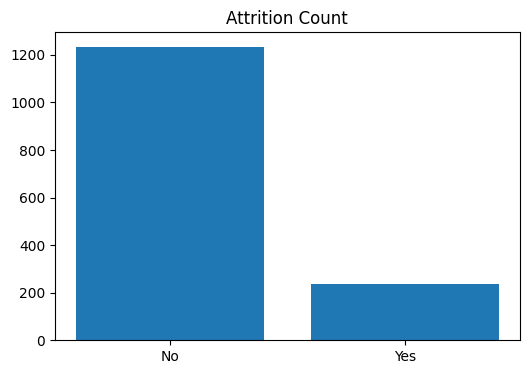

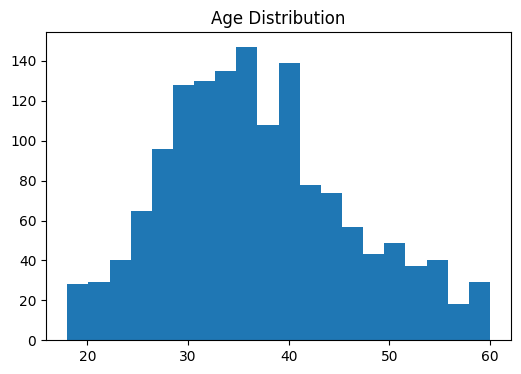

In [ ]:
# Visualizations examples
import matplotlib.pyplot as plt
if 'df' in globals():
    if 'attrition' in df.columns:
        counts = df['attrition'].value_counts()
        plt.figure(figsize=(6,4))
        plt.bar(counts.index.astype(str), counts.values)
        plt.title('Attrition Count')
        plt.show()
    if 'department' in df.columns and 'attrition' in df.columns:
        dept = df.groupby(['department','attrition']).size().unstack(fill_value=0)
        x = range(len(dept.index))
        plt.figure(figsize=(8,5))
        plt.bar([i-0.2 for i in x], dept.iloc[:,0], width=0.4)
        if dept.shape[1]>1:
            plt.bar([i+0.2 for i in x], dept.iloc[:,1], width=0.4)
        plt.xticks(x, dept.index, rotation=30)
        plt.title('Attrition by Department')
        plt.show()
    if 'age' in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df['age'].dropna(), bins=20)
        plt.title('Age Distribution')
        plt.show()
else:
    print('Dataframe df not found. Load dataset first.')


In [ ]:
# Save processed dataframe to CSV in the session (optional)
if 'df' in globals():
    out_path = 'feature_engineered_ibm_hr_colab.csv'
    df.to_csv(out_path, index=False)
    print('Saved processed CSV to', out_path)
else:
    print('df not found')


Saved processed CSV to feature_engineered_ibm_hr_colab.csv
